# **Deep Neural Network Method with Convolution**

The classification deep learning model has been created with convolution layers. The data has been split into training and test data. The convolution layers are inserted using the Conv2D function with ReLU as the activation function. Max Pooling has also been done to adjust the size of the image. Dropout has also been implemented to prevent overfitting and regularize the model. The architectureuses the adam optimizer algorithm. The metrics for evaluation of each epoch is accuracy. There are a total of 2 hidden layers and the output layer consists of a softmax classifier. The change in accuracy and the loss are visualized for gaining insights.

In [103]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import cifar10
from sklearn.metrics import accuracy_score
import pandas as pd
from keras import datasets
from keras.utils import np_utils
import seaborn as sns
from keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from keras.layers import BatchNormalization
# Disable all warnings
import time
warnings.filterwarnings("ignore")


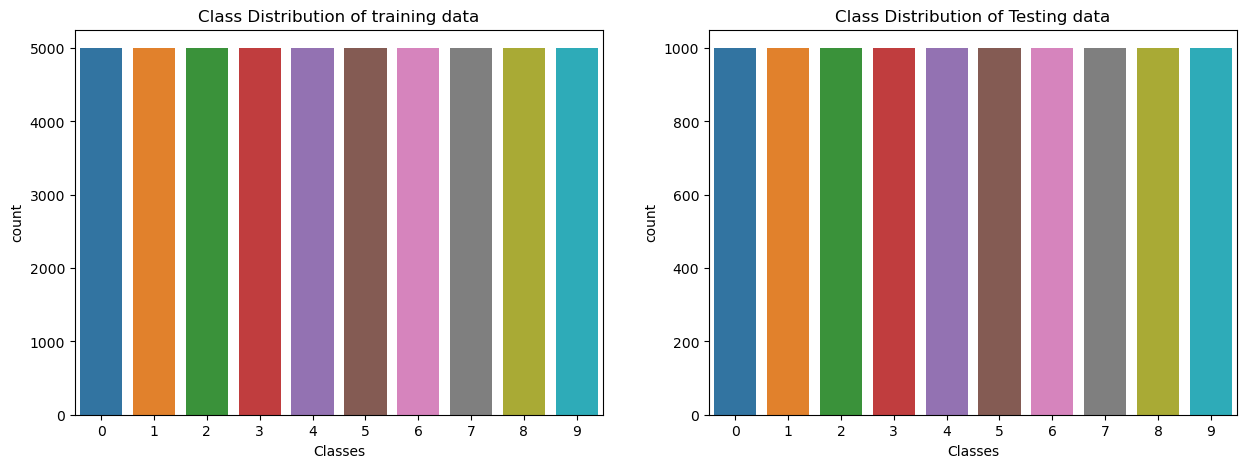

In [74]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(x = y_train.ravel(), ax=axs[0])
axs[0].set_title('Class Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(x = y_test.ravel(), ax=axs[1])
axs[1].set_title('Class Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()
# Convert class labels to one-hot encoded vectors
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

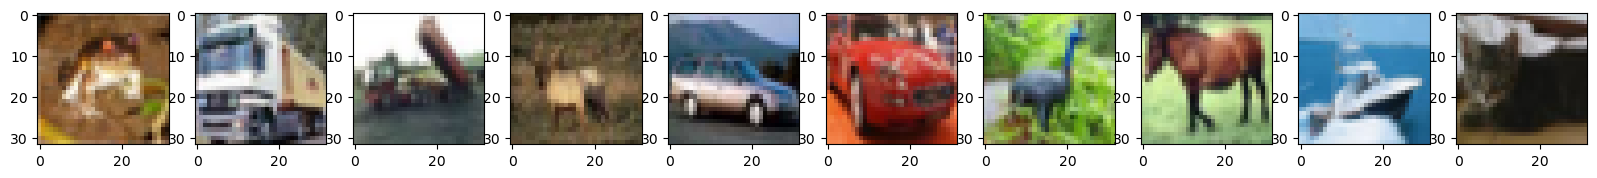

In [75]:
fig, axes = plt.subplots(1,10,figsize=(20,10))
for i in range(0,10):
    axes[i].imshow(x_train[i])
plt.show()

In [76]:
# Define model architecture
model = Sequential()
#Adding Convolution layer with relu activation
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
#Adding a softmax classifier layer for multicalss classification
model.add(Dense(num_classes, activation='softmax'))

In [77]:
# Compile the model
start_time = time.time()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), verbose=1)
end_time = time.time()
# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print('Convergence time:', end_time - start_time)

Epoch 1/50


2023-04-24 06:35:29.297794: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_15/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


782/782 [==============================] - 10s 10ms/step - loss: 1.5462 - accuracy: 0.4324 - val_loss: 1.2568 - val_accuracy: 0.5501
Epoch 2/50
782/782 [==============================] - 7s 9ms/step - loss: 1.1310 - accuracy: 0.5970 - val_loss: 0.9529 - val_accuracy: 0.6596
Epoch 3/50
782/782 [==============================] - 7s 9ms/step - loss: 0.9644 - accuracy: 0.6571 - val_loss: 0.8619 - val_accuracy: 0.6934
Epoch 4/50
782/782 [==============================] - 7s 9ms/step - loss: 0.8766 - accuracy: 0.6918 - val_loss: 0.7583 - val_accuracy: 0.7334
Epoch 5/50
782/782 [==============================] - 7s 9ms/step - loss: 0.8100 - accuracy: 0.7132 - val_loss: 0.7472 - val_accuracy: 0.7404
Epoch 6/50
782/782 [==============================] - 7s 9ms/step - loss: 0.7701 - accuracy: 0.7301 - val_loss: 0.7058 - val_accuracy: 0.7538
Epoch 7/50
782/782 [==============================] - 7s 9ms/step - loss: 0.7349 - accuracy: 0.7430 - val_loss: 0.6759 - val_accuracy: 0.7674
Epoch 8/50
782/

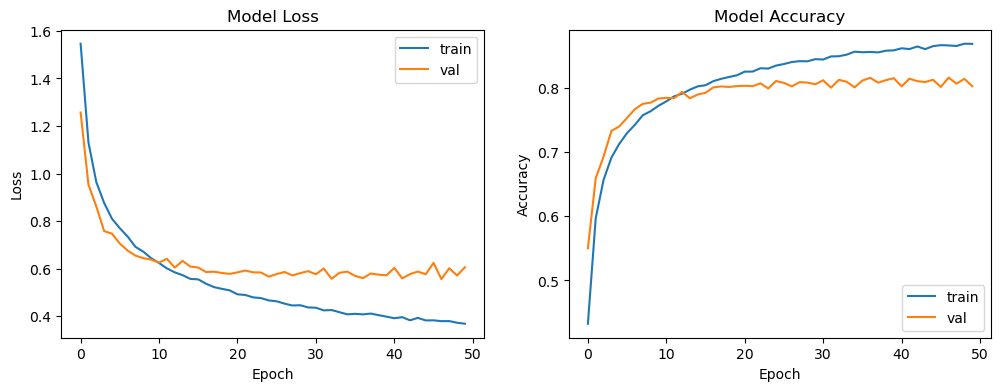

In [85]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [79]:
# Make predictions on test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
# Calculate accuracy on test data
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print('Test accuracy:', accuracy)

313/313 [==============================] - 1s 2ms/step
Test accuracy: 0.8031


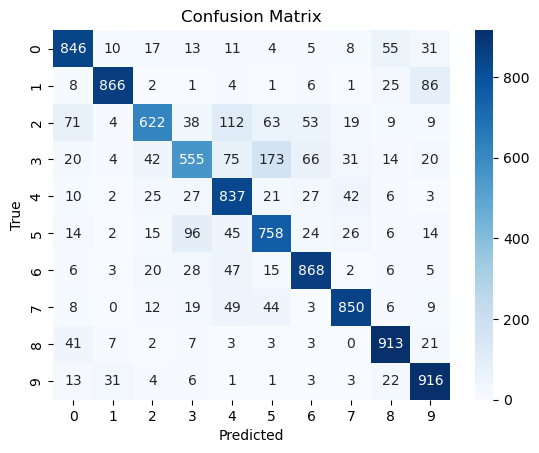

In [86]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [87]:
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8031
Precision: 0.8042667706193992
Recall: 0.8031
F1-Score: 0.8002724831991854


In [88]:
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.93      0.87      0.90      1000
           2       0.82      0.62      0.71      1000
           3       0.70      0.56      0.62      1000
           4       0.71      0.84      0.77      1000
           5       0.70      0.76      0.73      1000
           6       0.82      0.87      0.84      1000
           7       0.87      0.85      0.86      1000
           8       0.86      0.91      0.89      1000
           9       0.82      0.92      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



# Deep Neural Network without convolution

The classification deep learning model has been creataed without convolution layers. The data has been split into training and test data. The shape of the images are found out using the shape parameter. The neural network architecture is then created with ReLU function as the activation function with the adam optimizer algorithm. The metrics for evaluation of each epoch is accuracy. There are a total of 2 hidden layers and the output layer consists of a softmax classifier. The change in accuracy and the loss are visualized for gaining insights.

In [92]:
# Loading the dataset and splitting it into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Converting labels to one-hot encoded vectors
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Reshaping the input data
L, W, H, C = X_train.shape
X_train = X_train.reshape(-1, W*H*C)
X_test = X_test.reshape(-1, W*H*C)

# Normalizing the input data
X_train = X_train / 255.0
X_test = X_test / 255.0 

In [94]:
# Building the model
model = Sequential()
model.add(Dense(100, input_shape=X_train[1].shape, activation='relu', name="Hidden-1"))
model.add(BatchNormalization())  # Add batch normalization layer
model.add(Dropout(0))
model.add(Dense(50, activation='relu',name='Hidden-2'))
model.add(BatchNormalization())  # Add batch normalization layer
model.add(Dropout(0))
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
start_time = time.time()
# Training the model
history = model.fit(X_train, y_train, epochs=30, batch_size=100, validation_split=0.2) 

# Predicting the labels for test data
y_pred = model.predict(X_test)

# Converting predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Converting one-hot encoded labels to class labels
y_true_classes = np.argmax(y_test, axis=1)
end_time = time.time()
# Calculating confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

Epoch 1/30
400/400 [==============================] - 4s 6ms/step - loss: 1.7540 - accuracy: 0.3845 - val_loss: 3.2030 - val_accuracy: 0.1959
Epoch 2/30
400/400 [==============================] - 2s 5ms/step - loss: 1.5908 - accuracy: 0.4396 - val_loss: 1.7206 - val_accuracy: 0.3865
Epoch 3/30
400/400 [==============================] - 2s 5ms/step - loss: 1.5221 - accuracy: 0.4613 - val_loss: 1.7052 - val_accuracy: 0.3978
Epoch 4/30
400/400 [==============================] - 2s 5ms/step - loss: 1.4745 - accuracy: 0.4785 - val_loss: 1.7510 - val_accuracy: 0.3908
Epoch 5/30
400/400 [==============================] - 2s 6ms/step - loss: 1.4336 - accuracy: 0.4951 - val_loss: 1.6845 - val_accuracy: 0.4022
Epoch 6/30
400/400 [==============================] - 2s 5ms/step - loss: 1.4028 - accuracy: 0.5040 - val_loss: 1.6698 - val_accuracy: 0.4284
Epoch 7/30
400/400 [==============================] - 2s 5ms/step - loss: 1.3694 - accuracy: 0.5174 - val_loss: 1.6922 - val_accuracy: 0.4066
Epoch 

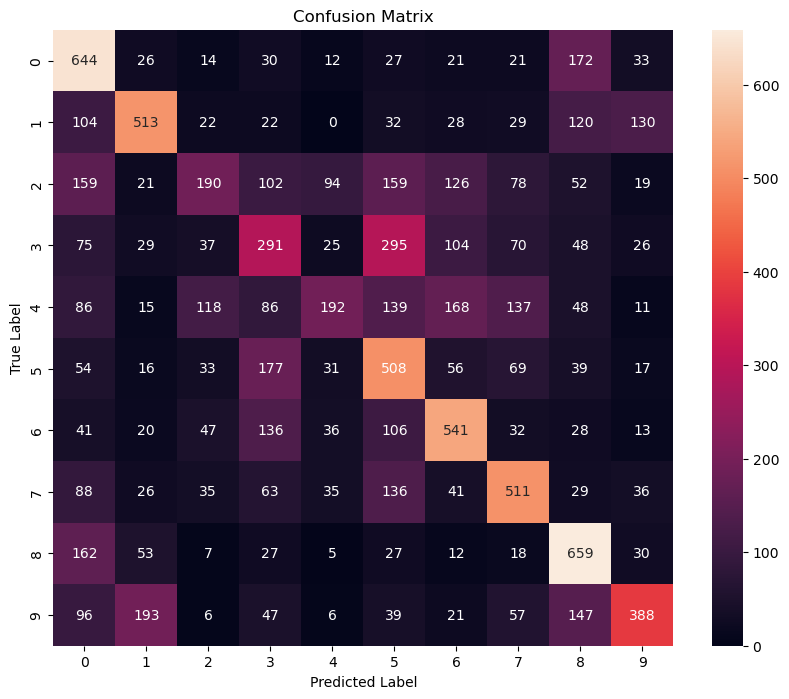

In [96]:
# Visualizing confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

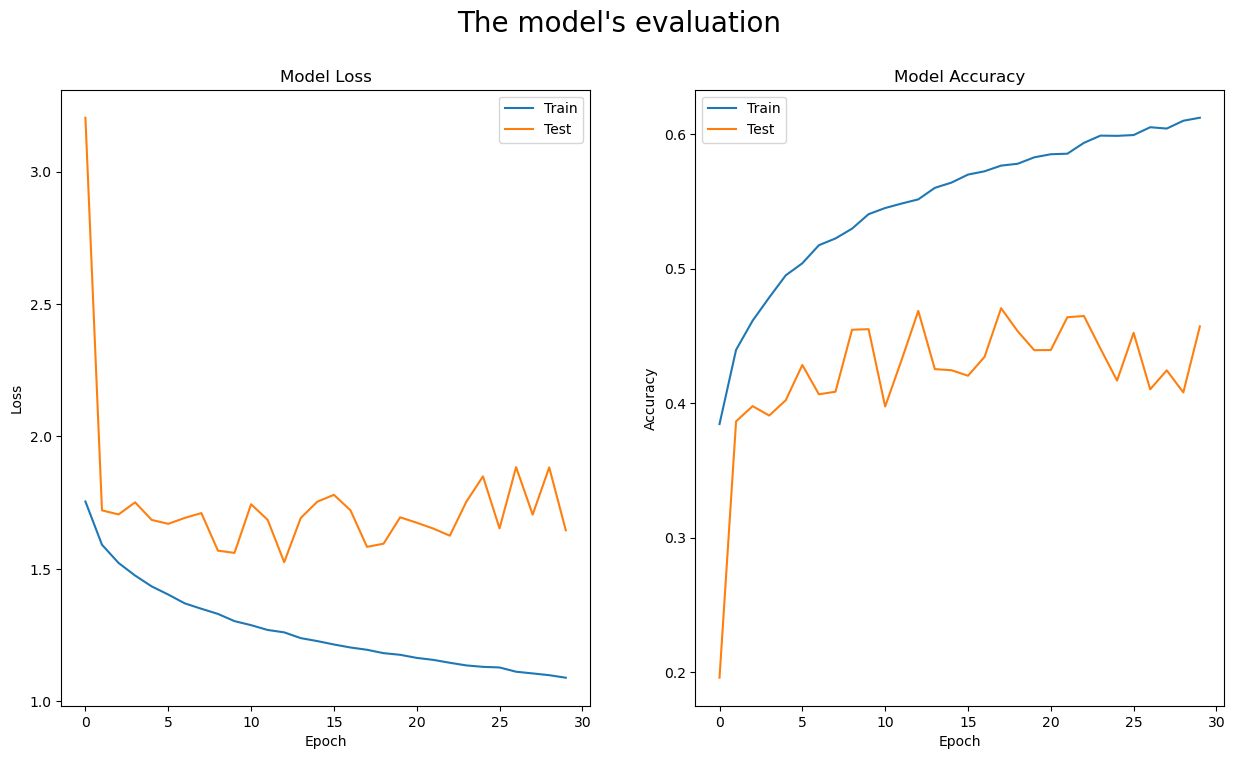

313/313 [==============================] - 1s 2ms/step


In [97]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model's evaluation ",fontsize=20)
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train','Test'])

axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train','Test'])
plt.show()
performance_test = model.evaluate(X_test, y_test, batch_size=100)
pred = model.predict(X_test)

In [100]:
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.43      0.64      0.51      1000
           1       0.56      0.51      0.54      1000
           2       0.37      0.19      0.25      1000
           3       0.30      0.29      0.29      1000
           4       0.44      0.19      0.27      1000
           5       0.35      0.51      0.41      1000
           6       0.48      0.54      0.51      1000
           7       0.50      0.51      0.51      1000
           8       0.49      0.66      0.56      1000
           9       0.55      0.39      0.46      1000

    accuracy                           0.44     10000
   macro avg       0.45      0.44      0.43     10000
weighted avg       0.45      0.44      0.43     10000



In [99]:
# Predict on test data
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Convergence time", end_time - start_time)


313/313 [==============================] - 1s 2ms/step
Accuracy: 0.4437
Precision: 0.44724840293102847
Recall: 0.44369999999999993
F1-Score: 0.4309387860289161
Convergence time 68.60328316688538


# Random Forest Classifier

The CIFAR-10 data has been split into training and test samples using cifar10.load_data() function. The training data is then fit with the random forest classifier and the predictions are done on the test set. The accuracy, precision and recall are calculated for this model as the evaluation metrics. 

In [101]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Split the data into train and test sets
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)
end_time = time.time()
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Convergence Time:", end_time - start_time)
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.4654
Convergence Time: 232.13136744499207
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1000
           1       0.52      0.54      0.53      1000
           2       0.38      0.33      0.35      1000
           3       0.33      0.28      0.30      1000
           4       0.39      0.38      0.39      1000
           5       0.43      0.40      0.41      1000
           6       0.47      0.57      0.52      1000
           7       0.51      0.45      0.48      1000
           8       0.58      0.61      0.59      1000
           9       0.47      0.52      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.46     10000
weighted avg       0.46      0.47      0.46     10000



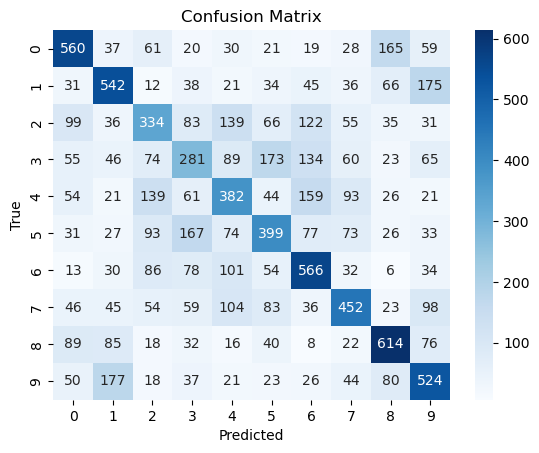

In [102]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# SVM With Kernel

This is a Kernel based SVM which uses the 'rbf' Kernel. First PCA is performed on the dataset for dimensionality reduction. This will improve the performance of SVM on the data. Then a pipeline is created with the PCA component and the SVM to which the data is fed. Once the data is fed into the pipeline the predictions are made

In [105]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Split the dataset into training and test sets
X_train, X_val_svm, y_train, y_val_svm = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [106]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=100, random_state=42)

# Create SVM classifier
svm = SVC(kernel='rbf', C=10, random_state=42)

# Create a pipeline with PCA and SVM
pipeline = make_pipeline(StandardScaler(), pca, svm)
start_time = time.time()
# Fit the pipeline to training data
pipeline.fit(X_train, y_train)

# Predict on validation set
y_pred_val_svm = pipeline.predict(X_val_svm)

# Calculate accuracy on validation set
val_accuracy = accuracy_score(y_val_svm, y_pred_val_svm)
print(f'Validation Accuracy: {val_accuracy:.2f}')


# Predict on test set
y_pred_test_svm = pipeline.predict(X_test)
end_time = time.time()
# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred_test_svm)
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Convergence time', end_time - start_time)

Validation Accuracy: 0.55
Test Accuracy: 0.55
Convergence time 338.5217912197113


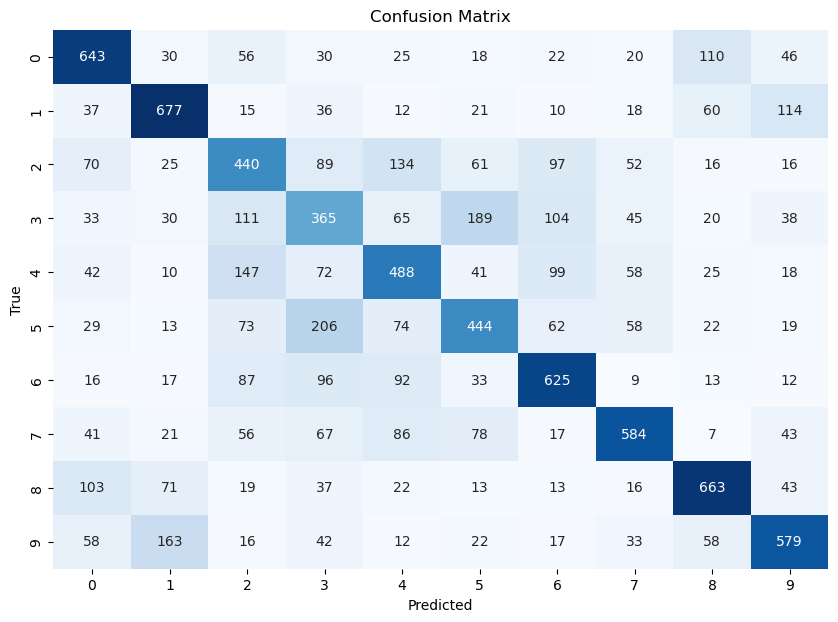

In [107]:

cm = confusion_matrix(y_test, y_pred_test_svm)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [108]:
print(classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62      1000
           1       0.64      0.68      0.66      1000
           2       0.43      0.44      0.44      1000
           3       0.35      0.36      0.36      1000
           4       0.48      0.49      0.49      1000
           5       0.48      0.44      0.46      1000
           6       0.59      0.62      0.61      1000
           7       0.65      0.58      0.62      1000
           8       0.67      0.66      0.66      1000
           9       0.62      0.58      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.55      0.55      0.55     10000

